# Πού Είναι τα Ταξί στη Νέα Υόρκη;

* Εμπνευσμένο από το κεφάλαιο 2 του βιβλίου του Cyrille Rossant, Learning IPython for Interactive Computing and Data Visualization, 2η έκδοση, Packt Publishing, 2015.

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

* Ξεκινάμε εισάγοντας τις βιβλιοθήκες που θα χρειαστούμε.

* Η βιβλιοθήκη [NumPy](https://numpy.org/) υλοποιηθεί πολύ βελτιστοποιημένες πράξεις πινάκων στην Python.

* Η βιβλιοθήκη [pandas](https://pandas.pydata.org/) είναι η βασική βιβλιοθήκη για την επεξεργασία δεδομένων στην Python.

* Με τη βιβλιοθήκη [matplotlib](https://matplotlib.org/) μπορούμε να οπτικοποιούμε τα δεδομένα μας.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Τώρα μπορούμε να διαβάσουμε τα δεδομένα που θα χρησιμοποιήσουμε.

* Tα δεδομένα αρχικά έγιναν διαθέσιμα χάρη στον [Chris Wong](https://chriswhong.com/) το 2013 κατόπιν [αίτησής του σύμφωνα με τη νομοθεσία για την ελευθερία της πληροφορίας (Freedom of Information Law, FOIL)](https://chriswhong.com/open-data/foil_nyc_taxi/).

* Εμείς θα χρησιμοποιήσουμε ένα τυχαίο δείγμα του 1% των δεδομένων.

* Νεότερα δεδομένα είναι διαθέσιμα από το [NYC Taxi and Limousine Commission (TLC)](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

In [2]:
data_filename = "nyc_taxi_trip_data_sample.csv.zip"

* Αν αποσυμπιέσουμε το αρχείο και το ανοίξουμε θα δούμε ότι τα δεδομένα είναι ως εξής:

```
medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
037CB433AB5895649F7A9EF37F767EF1,F57FA13A6A82FE2F40D9DB0193DE0FEE,VTS,1,,2013-10-04 20:20:00,2013-10-04 20:42:00,1,1320,4.05,-73.990089,40.723377,-73.941559,40.70779
E05E952B2DA14C7E9F1D7DEB80667739,11A3989B7BABB288FA3FA233E348C450,CMT,1,N,2013-09-27 14:16:04,2013-09-27 14:37:17,1,1273,2.10,-73.960022,40.710678,-73.994324,40.722858
51B267141807D0261EEB1844D2A78087,9DE60DFD683336F899D5BB448CE7CB09,CMT,1,N,2013-07-18 13:24:37,2013-07-18 13:29:27,3,290,.90,-73.970634,40.76041,-73.960213,40.770241
76AC5C0F44D07BA5A2291F19E730B0B9,2348E03BB8227595281D9D6B38E45B38,VTS,1,,2013-06-25 12:12:00,2013-06-25 12:28:00,2,960,1.28,-73.992661,40.752766,-73.975952,40.751781
```

* Για να διαβάσουμε τα δεδομένα θα χρησιμοποιήσουμε τη συνάρτηση `read_csv()` του pandas.


In [3]:
data = pd.read_csv(data_filename)

* Η μεταβλητή `data` περιέχει ένα αντικείμενο `DataFrame`. 

* Ένα `DataFrame` είναι ένας πίνακας που περιέχει γραμμές (παρατηρήσεις) και στήλες (χαρακτηριστικά). 

* Ένα `DataFrame` μπορεί να περιέχει κείμενο, αριθμούς, ημερομηνίες, και άλλους τύπους δεδομένων. 

In [4]:
data

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,037CB433AB5895649F7A9EF37F767EF1,F57FA13A6A82FE2F40D9DB0193DE0FEE,VTS,1,NaN,2013-10-04 20:20:00,2013-10-04 20:42:00,1,1320,4.05,-73.990089,40.723377,-73.941559,40.707790
1,E05E952B2DA14C7E9F1D7DEB80667739,11A3989B7BABB288FA3FA233E348C450,CMT,1,N,2013-09-27 14:16:04,2013-09-27 14:37:17,1,1273,2.10,-73.960022,40.710678,-73.994324,40.722858
2,51B267141807D0261EEB1844D2A78087,9DE60DFD683336F899D5BB448CE7CB09,CMT,1,N,2013-07-18 13:24:37,2013-07-18 13:29:27,3,290,0.90,-73.970634,40.760410,-73.960213,40.770241
3,76AC5C0F44D07BA5A2291F19E730B0B9,2348E03BB8227595281D9D6B38E45B38,VTS,1,NaN,2013-06-25 12:12:00,2013-06-25 12:28:00,2,960,1.28,-73.992661,40.752766,-73.975952,40.751781
4,739323AC15DADABE4B54561CB3330C53,9387A0902D7B1B4597802BE63AE7C34F,VTS,1,NaN,2013-04-19 05:28:00,2013-04-19 05:38:00,1,600,2.22,-73.999107,40.727924,-73.974869,40.741886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731792,5DAE4FE51457F5B4D4950D00A0AD4394,B76DC9DC874EB9D71CC04ABC0D9AAC6A,CMT,1,N,2013-08-02 03:34:00,2013-08-02 03:51:47,2,1067,6.00,-73.995766,40.764359,-73.920052,40.775574
1731793,3C16CFAD2B12F3508F7211C37F8F8B8F,A36B62F2B6D1D6C289519810E66EAAB9,VTS,1,NaN,2013-02-21 12:44:00,2013-02-21 13:11:00,6,1620,3.94,0.000000,0.000000,0.000000,0.000000
1731794,23E5F1FDC96168E865BF7B4427C0163B,E7D75D6D6F2DBD7D25578F02991193D9,VTS,1,NaN,2013-02-16 17:24:00,2013-02-16 17:30:00,3,360,2.15,-73.991554,40.726940,-73.971642,40.751362
1731795,FE44D1131D86D515C88D5296598DD35A,015615BB1B66BA269602ED1A867271FA,CMT,1,N,2013-05-24 10:29:16,2013-05-24 10:44:39,1,923,7.20,-73.865715,40.771168,-73.809006,40.700127


* Μπορούμε να δούμε τις διαστάσεις ενός `DataFrame` χρησιμοποιώντας την ιδιότητα `shape`.

In [5]:
data.shape

(1731797, 14)

* Η μέθοδος `head()` μας δίνει τις αρχικές γραμμές ενός `DataFrame`.

In [6]:
data.head(3)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,037CB433AB5895649F7A9EF37F767EF1,F57FA13A6A82FE2F40D9DB0193DE0FEE,VTS,1,NaN,2013-10-04 20:20:00,2013-10-04 20:42:00,1,1320,4.05,-73.990089,40.723377,-73.941559,40.707790
1,E05E952B2DA14C7E9F1D7DEB80667739,11A3989B7BABB288FA3FA233E348C450,CMT,1,N,2013-09-27 14:16:04,2013-09-27 14:37:17,1,1273,2.10,-73.960022,40.710678,-73.994324,40.722858
2,51B267141807D0261EEB1844D2A78087,9DE60DFD683336F899D5BB448CE7CB09,CMT,1,N,2013-07-18 13:24:37,2013-07-18 13:29:27,3,290,0.90,-73.970634,40.760410,-73.960213,40.770241


* Μπορούμε επίσης να το χειριστούμε με το συνηθισμένο συντακτικό της Python για ακολουθίες δεδομένων:

In [7]:
data[:3]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,037CB433AB5895649F7A9EF37F767EF1,F57FA13A6A82FE2F40D9DB0193DE0FEE,VTS,1,NaN,2013-10-04 20:20:00,2013-10-04 20:42:00,1,1320,4.05,-73.990089,40.723377,-73.941559,40.707790
1,E05E952B2DA14C7E9F1D7DEB80667739,11A3989B7BABB288FA3FA233E348C450,CMT,1,N,2013-09-27 14:16:04,2013-09-27 14:37:17,1,1273,2.10,-73.960022,40.710678,-73.994324,40.722858
2,51B267141807D0261EEB1844D2A78087,9DE60DFD683336F899D5BB448CE7CB09,CMT,1,N,2013-07-18 13:24:37,2013-07-18 13:29:27,3,290,0.90,-73.970634,40.760410,-73.960213,40.770241


* Αντίστοιχα, η μέθοδος `tail()` μας δίνει τις τελευταίες γραμμές ενός `DataFrame`.

In [8]:
data.tail(3)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
1731794,23E5F1FDC96168E865BF7B4427C0163B,E7D75D6D6F2DBD7D25578F02991193D9,VTS,1,NaN,2013-02-16 17:24:00,2013-02-16 17:30:00,3,360,2.15,-73.991554,40.726940,-73.971642,40.751362
1731795,FE44D1131D86D515C88D5296598DD35A,015615BB1B66BA269602ED1A867271FA,CMT,1,N,2013-05-24 10:29:16,2013-05-24 10:44:39,1,923,7.20,-73.865715,40.771168,-73.809006,40.700127
1731796,465FE7E793D67BBB8A7A9869065170E5,E5D211ECD1F6A6164B6CFF1EB9B50499,CMT,1,N,2013-03-15 14:42:10,2013-03-15 14:51:20,1,549,0.70,-74.002968,40.718216,-74.011620,40.708351


* Ή πάλι με το γνώριμο συντακτικό της Python:

In [9]:
data[-3:]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
1731794,23E5F1FDC96168E865BF7B4427C0163B,E7D75D6D6F2DBD7D25578F02991193D9,VTS,1,NaN,2013-02-16 17:24:00,2013-02-16 17:30:00,3,360,2.15,-73.991554,40.726940,-73.971642,40.751362
1731795,FE44D1131D86D515C88D5296598DD35A,015615BB1B66BA269602ED1A867271FA,CMT,1,N,2013-05-24 10:29:16,2013-05-24 10:44:39,1,923,7.20,-73.865715,40.771168,-73.809006,40.700127
1731796,465FE7E793D67BBB8A7A9869065170E5,E5D211ECD1F6A6164B6CFF1EB9B50499,CMT,1,N,2013-03-15 14:42:10,2013-03-15 14:51:20,1,549,0.70,-74.002968,40.718216,-74.011620,40.708351


* Η μέθοδος `describe()` μας δίνει βασικά στοιχεία περιγραφικής στατιστικής.

In [10]:
data.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,1.731797e+06,1.731797e+06,1.731797e+06,1.731797e+06,1.731797e+06,1.731797e+06,1.731767e+06,1.731767e+06
mean,1.033927e+00,1.707519e+00,8.110141e+02,3.458005e+00,-7.244724e+01,3.974714e+01,-7.240237e+01,3.972352e+01
std,4.174030e-01,1.373835e+00,1.561974e+04,7.221295e+02,1.122722e+01,8.509423e+00,1.134113e+01,8.562259e+00
min,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00,-7.400217e+02,-3.117494e+03,-1.800000e+02,-3.114296e+03
25%,1.000000e+00,1.000000e+00,3.600000e+02,1.040000e+00,-7.399218e+01,4.073443e+01,-7.399147e+01,4.073352e+01
50%,1.000000e+00,1.000000e+00,6.000000e+02,1.800000e+00,-7.398184e+01,4.075238e+01,-7.398027e+01,4.075280e+01
75%,1.000000e+00,2.000000e+00,9.600000e+02,3.200000e+00,-7.396687e+01,4.076700e+01,-7.396362e+01,4.076778e+01
max,2.100000e+02,7.000000e+00,4.294941e+06,9.500000e+05,5.197732e+01,7.400267e+01,8.431574e+01,7.401300e+01


* Η βασική βιβλιοθήκη για οπτικοποίηση δεδομένων με την Python είναι η [matplotlib](https://matplotlib.org/).

* Θα εξετάσουμε τα σημεία της πόλης στα οποία οι επιβάτες μπαίνουν σε ταξί.

* Το πρώτο βήμα είναι να βρούμε τις γεωγραφικές συντεταγμένες των σημείων από το `DataFrame`.

* Για να θυμηθούμε ποιες είναι οι στήλες.

In [11]:
data.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

* Υπάρχουν τέσσερεις στήλες που αντιστοιχούν στις συντεταγμένες όπου ο επιβάτης μπαίνει και κατεβαίνει από το όχημα:

  * `pickup_longitude`
  * `pickup_latitude`
  * `dropoff_longitude`
  * `dropoff_latitude`

* Θα επικεντρωθούμε όπως είπαμε στα σημεία που ξεκινάει μια διαδρομή.

* Μπορούμε να αναφερθούμε σε μία στήλη ενός `DataFrame` δίνοντας το όνομα του `DataFrame`, τελεία, και το όνομα της στήλης:

In [12]:
data.pickup_longitude

0         -73.990089
1         -73.960022
2         -73.970634
3         -73.992661
4         -73.999107
             ...    
1731792   -73.995766
1731793     0.000000
1731794   -73.991554
1731795   -73.865715
1731796   -74.002968
Name: pickup_longitude, Length: 1731797, dtype: float64

* Εναλλακτικά, μπορούμε να χρησιμοποιήσουμε το συντακτικό που χρησιμοποιούμε στα λεξικά της Python:

In [13]:
data['pickup_latitude']

0          40.723377
1          40.710678
2          40.760410
3          40.752766
4          40.727924
             ...    
1731792    40.764359
1731793     0.000000
1731794    40.726940
1731795    40.771168
1731796    40.718216
Name: pickup_latitude, Length: 1731797, dtype: float64

* Κάθε στήλη είναι ένα αντικείμενο τύπου `Series`.

* Άρα, ένα `DataFrame` είναι τελικά ένα σύνολο από στήλες τύπου `Series`.

* Πριν είδαμε ότι κάποιες από τις τιμές του `DataFrame` δεν βγάζουν νόημα.

* Το εύρος τιμών του γεωγραφικού πλάτους θα πρέπει να είναι μεταξύ 0 και 90 μοιρών.

* Είναι όμως πράγματι έτσι;

* Μπορούμε να το εξακριβώσουμε καλώντας τις κατάλληλες μεθόδους στα αντικείμενα `Series` της στήλης που μας ενδιάφερει.

In [14]:
print(data['pickup_latitude'].min(), data['pickup_latitude'].max())

-3117.4944 74.00267


* Το εύρος τιμών του γεωγραφικού μήκους θα πρέπει να είναι μεταξύ -180 και 0 μοιρών (ή μάλλον πολύ μικρότερο, αφού αμφίβια ταξί δεν έχουμε στα δεδομένα μας).

* Πάλι, είναι πράγματι έτσι;

In [15]:
print(data['pickup_longitude'].min(), data['pickup_longitude'].max())

-740.02167 51.977318


* Αν θέλουμε να ορίσουμε ένα φίλτρο στις τιμές μιας στήλης, ξεκινάμε ορίζοντας τη συνθήκη που μας ενδιαφέρει.

* Μια λογική συνθήκη σε μία στήλη επιστρέφει ένα λογικό διάνυσμα (με τιμές `True` και `False`):

In [16]:
data['pickup_latitude'] >= 0

0          True
1          True
2          True
3          True
4          True
           ... 
1731792    True
1731793    True
1731794    True
1731795    True
1731796    True
Name: pickup_latitude, Length: 1731797, dtype: bool

* Αν δώσουμε ένα λογικό διάνυσμα σε ένα `DataFrame` παίρνουμε τις γραμμές του `DataFrame` για τις οποίες το διάνυσμα έχει την τιμή `True`.

In [17]:
print(data.shape[0])
data[data['pickup_latitude'] >= 0]

1731797


,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,037CB433AB5895649F7A9EF37F767EF1,F57FA13A6A82FE2F40D9DB0193DE0FEE,VTS,1,NaN,2013-10-04 20:20:00,2013-10-04 20:42:00,1,1320,4.05,-73.990089,40.723377,-73.941559,40.707790
1,E05E952B2DA14C7E9F1D7DEB80667739,11A3989B7BABB288FA3FA233E348C450,CMT,1,N,2013-09-27 14:16:04,2013-09-27 14:37:17,1,1273,2.10,-73.960022,40.710678,-73.994324,40.722858
2,51B267141807D0261EEB1844D2A78087,9DE60DFD683336F899D5BB448CE7CB09,CMT,1,N,2013-07-18 13:24:37,2013-07-18 13:29:27,3,290,0.90,-73.970634,40.760410,-73.960213,40.770241
3,76AC5C0F44D07BA5A2291F19E730B0B9,2348E03BB8227595281D9D6B38E45B38,VTS,1,NaN,2013-06-25 12:12:00,2013-06-25 12:28:00,2,960,1.28,-73.992661,40.752766,-73.975952,40.751781
4,739323AC15DADABE4B54561CB3330C53,9387A0902D7B1B4597802BE63AE7C34F,VTS,1,NaN,2013-04-19 05:28:00,2013-04-19 05:38:00,1,600,2.22,-73.999107,40.727924,-73.974869,40.741886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731792,5DAE4FE51457F5B4D4950D00A0AD4394,B76DC9DC874EB9D71CC04ABC0D9AAC6A,CMT,1,N,2013-08-02 03:34:00,2013-08-02 03:51:47,2,1067,6.00,-73.995766,40.764359,-73.920052,40.775574
1731793,3C16CFAD2B12F3508F7211C37F8F8B8F,A36B62F2B6D1D6C289519810E66EAAB9,VTS,1,NaN,2013-02-21 12:44:00,2013-02-21 13:11:00,6,1620,3.94,0.000000,0.000000,0.000000,0.000000
1731794,23E5F1FDC96168E865BF7B4427C0163B,E7D75D6D6F2DBD7D25578F02991193D9,VTS,1,NaN,2013-02-16 17:24:00,2013-02-16 17:30:00,3,360,2.15,-73.991554,40.726940,-73.971642,40.751362
1731795,FE44D1131D86D515C88D5296598DD35A,015615BB1B66BA269602ED1A867271FA,CMT,1,N,2013-05-24 10:29:16,2013-05-24 10:44:39,1,923,7.20,-73.865715,40.771168,-73.809006,40.700127


* Εδώ όμως θέλουμε το γεωγραφικό πλάτος να είναι από το 0 έως και το 90.

* Αυτό μπορούμε να το κάνουμε συνδέοντας τις δύο αντίστοιχες λογικές συνθήκες με τον τελεστή `&` (o αντίστοιχος διαζευκτικός τελευστής, ή, είναι ο `|`).

In [18]:
data[(data['pickup_latitude'] >= 0) & (data['pickup_latitude'] <= 90)]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,037CB433AB5895649F7A9EF37F767EF1,F57FA13A6A82FE2F40D9DB0193DE0FEE,VTS,1,NaN,2013-10-04 20:20:00,2013-10-04 20:42:00,1,1320,4.05,-73.990089,40.723377,-73.941559,40.707790
1,E05E952B2DA14C7E9F1D7DEB80667739,11A3989B7BABB288FA3FA233E348C450,CMT,1,N,2013-09-27 14:16:04,2013-09-27 14:37:17,1,1273,2.10,-73.960022,40.710678,-73.994324,40.722858
2,51B267141807D0261EEB1844D2A78087,9DE60DFD683336F899D5BB448CE7CB09,CMT,1,N,2013-07-18 13:24:37,2013-07-18 13:29:27,3,290,0.90,-73.970634,40.760410,-73.960213,40.770241
3,76AC5C0F44D07BA5A2291F19E730B0B9,2348E03BB8227595281D9D6B38E45B38,VTS,1,NaN,2013-06-25 12:12:00,2013-06-25 12:28:00,2,960,1.28,-73.992661,40.752766,-73.975952,40.751781
4,739323AC15DADABE4B54561CB3330C53,9387A0902D7B1B4597802BE63AE7C34F,VTS,1,NaN,2013-04-19 05:28:00,2013-04-19 05:38:00,1,600,2.22,-73.999107,40.727924,-73.974869,40.741886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731792,5DAE4FE51457F5B4D4950D00A0AD4394,B76DC9DC874EB9D71CC04ABC0D9AAC6A,CMT,1,N,2013-08-02 03:34:00,2013-08-02 03:51:47,2,1067,6.00,-73.995766,40.764359,-73.920052,40.775574
1731793,3C16CFAD2B12F3508F7211C37F8F8B8F,A36B62F2B6D1D6C289519810E66EAAB9,VTS,1,NaN,2013-02-21 12:44:00,2013-02-21 13:11:00,6,1620,3.94,0.000000,0.000000,0.000000,0.000000
1731794,23E5F1FDC96168E865BF7B4427C0163B,E7D75D6D6F2DBD7D25578F02991193D9,VTS,1,NaN,2013-02-16 17:24:00,2013-02-16 17:30:00,3,360,2.15,-73.991554,40.726940,-73.971642,40.751362
1731795,FE44D1131D86D515C88D5296598DD35A,015615BB1B66BA269602ED1A867271FA,CMT,1,N,2013-05-24 10:29:16,2013-05-24 10:44:39,1,923,7.20,-73.865715,40.771168,-73.809006,40.700127


* Αλλά ακόμα δεν τελειώσαμε, θέλουμε και το γεωγραφικό μήκος να είναι από το -180 έως και το 0, άρα συνδέουμε και τις επιπλέον λογικές συνθήκες.

In [19]:
data = data[(data['pickup_latitude'] >= 0) & (data['pickup_latitude'] <= 90) &
            (data['pickup_longitude'] >= -180) & (data['pickup_longitude'] <= 0) 
]
data

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,037CB433AB5895649F7A9EF37F767EF1,F57FA13A6A82FE2F40D9DB0193DE0FEE,VTS,1,NaN,2013-10-04 20:20:00,2013-10-04 20:42:00,1,1320,4.05,-73.990089,40.723377,-73.941559,40.707790
1,E05E952B2DA14C7E9F1D7DEB80667739,11A3989B7BABB288FA3FA233E348C450,CMT,1,N,2013-09-27 14:16:04,2013-09-27 14:37:17,1,1273,2.10,-73.960022,40.710678,-73.994324,40.722858
2,51B267141807D0261EEB1844D2A78087,9DE60DFD683336F899D5BB448CE7CB09,CMT,1,N,2013-07-18 13:24:37,2013-07-18 13:29:27,3,290,0.90,-73.970634,40.760410,-73.960213,40.770241
3,76AC5C0F44D07BA5A2291F19E730B0B9,2348E03BB8227595281D9D6B38E45B38,VTS,1,NaN,2013-06-25 12:12:00,2013-06-25 12:28:00,2,960,1.28,-73.992661,40.752766,-73.975952,40.751781
4,739323AC15DADABE4B54561CB3330C53,9387A0902D7B1B4597802BE63AE7C34F,VTS,1,NaN,2013-04-19 05:28:00,2013-04-19 05:38:00,1,600,2.22,-73.999107,40.727924,-73.974869,40.741886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731792,5DAE4FE51457F5B4D4950D00A0AD4394,B76DC9DC874EB9D71CC04ABC0D9AAC6A,CMT,1,N,2013-08-02 03:34:00,2013-08-02 03:51:47,2,1067,6.00,-73.995766,40.764359,-73.920052,40.775574
1731793,3C16CFAD2B12F3508F7211C37F8F8B8F,A36B62F2B6D1D6C289519810E66EAAB9,VTS,1,NaN,2013-02-21 12:44:00,2013-02-21 13:11:00,6,1620,3.94,0.000000,0.000000,0.000000,0.000000
1731794,23E5F1FDC96168E865BF7B4427C0163B,E7D75D6D6F2DBD7D25578F02991193D9,VTS,1,NaN,2013-02-16 17:24:00,2013-02-16 17:30:00,3,360,2.15,-73.991554,40.726940,-73.971642,40.751362
1731795,FE44D1131D86D515C88D5296598DD35A,015615BB1B66BA269602ED1A867271FA,CMT,1,N,2013-05-24 10:29:16,2013-05-24 10:44:39,1,923,7.20,-73.865715,40.771168,-73.809006,40.700127


* Πριν κάνουμε το διάγραμμά μας, θέλουμε να μετατρέψουμε τις συντεταγμένες σε συντεταγμένες στην οθόνη (pixels) από γεωγραφικές συντεταγμένες που είναι αυτή τη στιγμή.

* Μπορούμε να χρησιμοποιήσουμε την παρακάτω συνάρτηση η οποία υλοποιεί προβολή κατά Μερκάτορ (Φλαμανδός γεωγράφος και χαρτογράφος του 16ου αιώνα).

* Στην πραγματκότητα πρόκειται για την [Προβολή Μερκάτορ που χρησιμοποιείται σε διαδικτυακούς χάρτες](https://en.wikipedia.org/wiki/Web_Mercator_projection) προσαρμοσμένη ώστε το σημείο (0, 0) να είναι στο κάτω αριστερό σημείο (αντί για το πάνω αριστερό).

In [20]:
def lng_lat_to_pixels(lng, lat):    
    lng_rad = lng * np.pi / 180
    lat_rad = lat * np.pi / 180
    x = (256/(2*np.pi))*(lng_rad + np.pi)
    y = (256/(2*np.pi))*(np.log(np.tan(np.pi/4 + lat_rad/2)))
    return (x, y)

* Η βιβλιοθήκη NumPy προσφέρει πολλές μαθηματικές συναρτήσεις όπως `np.log()` and `np.tan()`. 

* Αυτές μπορούν να εφαρμοστούν είτε σε μεμονωμένους αριθμούς, είτε σε διανύσματα.

* Έτσι, η παρακάτω κλήση θα μας επιστρέψει δύο *διανύσματα*.

In [21]:
px, py = lng_lat_to_pixels(data['pickup_longitude'], data['pickup_latitude'])
px.head(10)

0    75.384826
1    75.406207
2    75.398660
3    75.382997
4    75.378413
5    75.383789
6    75.384993
7    75.414177
8    75.391119
9    75.388048
Name: pickup_longitude, dtype: float64

* Για να ζωγραφίσουμε ένα σύνολο σημείων με το matplotlib χρησιμοποιούμε τη μέθοδο `scatter()`.

* Η μέθοδος αυτή παίρνει ως είσοδο δύο πίνακες-διανύσματα με τις συντεταγμένες $x$ και $y$ των σημείων που θέλουμε να δείξουμε.

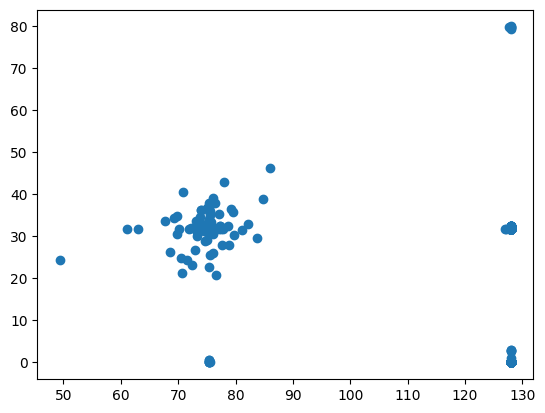

In [22]:
plt.scatter(px, py)

* Το αποτέλεσμα δεν είναι ιδανικό.

* Πρώτον: το αποτύπωμα του κάθε σημείου είναι πολύ μεγάλο.

* Δεύτερον: τα σημεία είναι πάρα πολλά. Θα μπορούσαμε να τα κάνουμε κάπως διαφανή για να αποκτήσουμε μια καλύτερη ιδέα για την κατανομή τους.

* Τρίτον: μάλλον θα πρέπει να επικεντρώσουμε την προσοχή μας στο κάτω αριστερό κομμάτι της εικόνας. 

* Τέταρτον: η εικόνα μπορεί να μεγαλώσει.

* Τέλος, οι άξονες δεν προσφέρουν κάτι.

* Ευτυχώς, όλα αυτά μπορούμε να τα κάνουμε με το matplotlib.

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


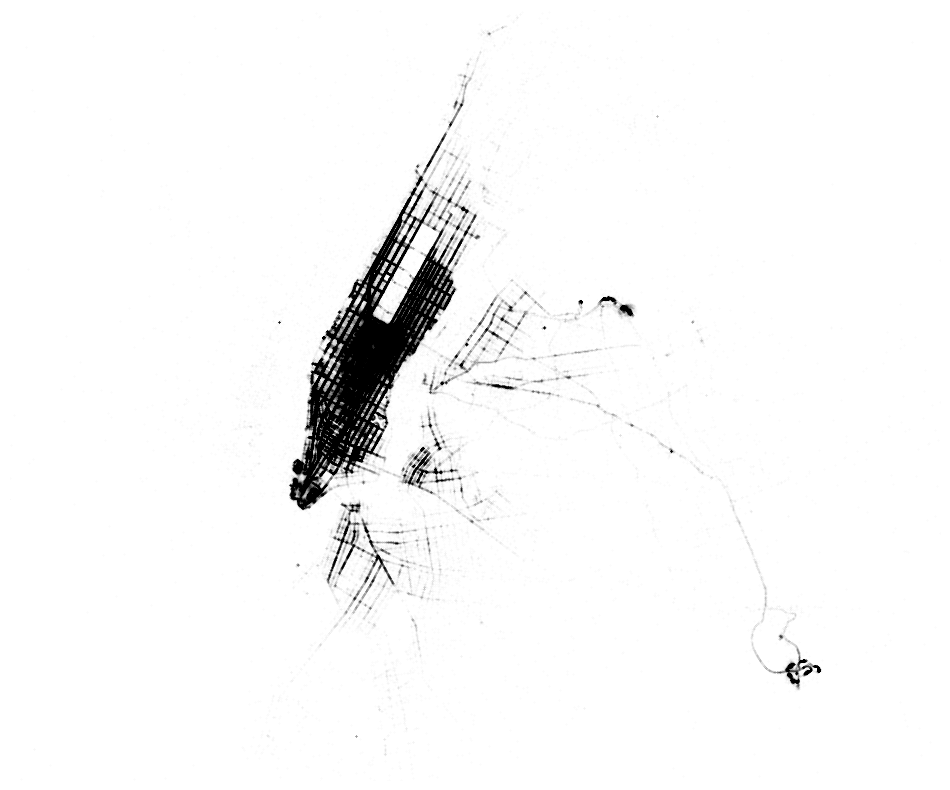

In [23]:
plt.figure(figsize=(12, 10))
plt.axis('equal')
plt.xlim(75.3, 75.55)
plt.ylim(31.65, 31.90)
plt.axis('off')
plt.gca().set_facecolor('white')
_ = plt.scatter(px, py, s=.1, alpha=.03, color='black') # get rid of matplotlib message output